# Homework (12 pts) - Probability Distributions of Random Variables

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.rcParams['axes.labelsize'] = 18

1. (3 pts) Assume that the rate of deleterious mutations on average is 1.2 per diploid genome. However, due to certain environmental factors, the mutation rate in a particular city is doubled. Plot the probabilities of having zero up to 10 mutations. If having eight or more mutations has a 50% chance of being lethal, how many deaths are expected out of 1000 residents of this city?

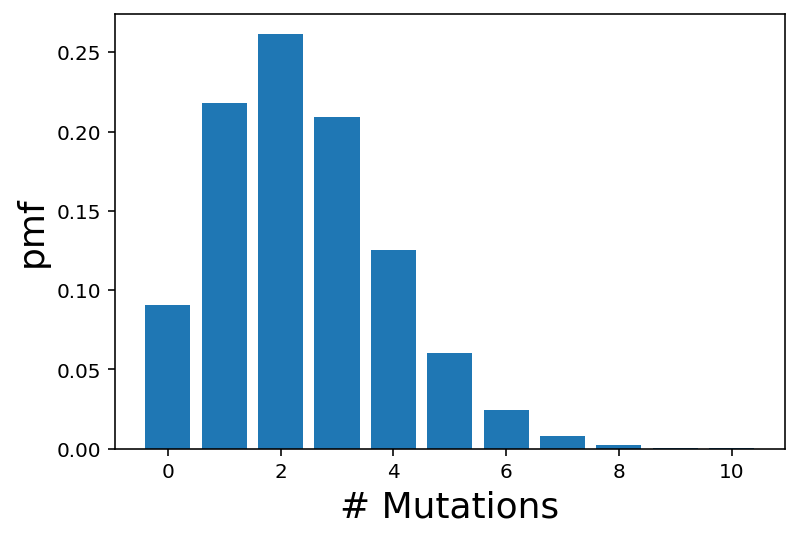

In [4]:
mutationRate = 1.2 * 2
numMutationsDist = st.poisson(mutationRate)

numMutations = np.arange(11)

plt.bar(numMutations, numMutationsDist.pmf(numMutations))
plt.xlabel('# Mutations')
plt.ylabel('pmf');

In [5]:
prob8orMore = numMutationsDist.sf(7)

numIndividualsWith8orMore = 1000 * prob8orMore

numExpectedDeaths = numIndividualsWith8orMore * 0.50

print(f"{numExpectedDeaths :.2f} deaths are expected per 1000 individuals.")

1.67 deaths are expected per 1000 individuals.


2. (3 pts) You are recording action potentials from a single neuron, and observe a spike on average once every 0.5 seconds. Plot the expected distribution of interspike intervals from zero up to the time for which 95% of all intervals are accounted for. If this neuron needs to fire two consecutive spikes within 0.1 seconds in order for a downstream neuron to spike, what is the average spike rate of the downstream neuron?

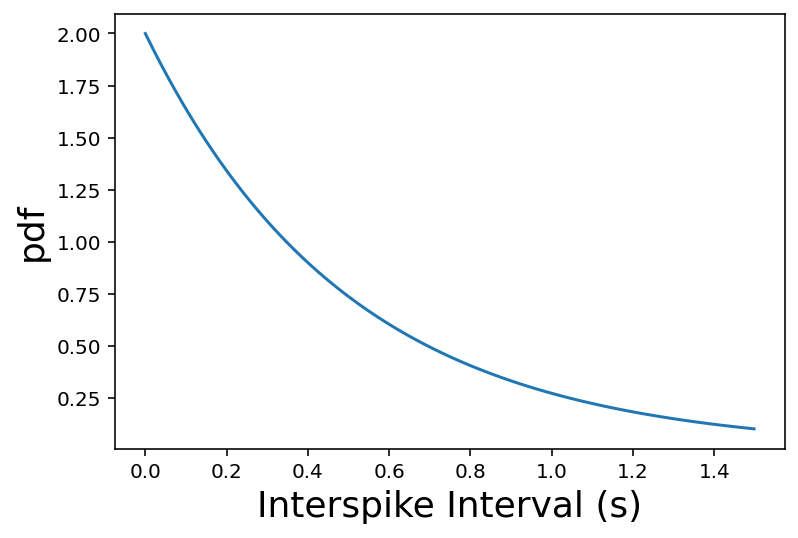

In [6]:
spikeRate_Hz = 2  # per second
intervalsDist = st.expon(loc=0, scale=1/spikeRate_Hz)

intervals_sec = np.linspace(0, intervalsDist.ppf(0.95), 100)

plt.plot(intervals_sec, intervalsDist.pdf(intervals_sec))
plt.xlabel('Interspike Interval (s)')
plt.ylabel('pdf');

In [7]:
# downstream rate = upstream rate * probability that upstream spike interval is less than 0.1 seconds
probIntervalLessThan100ms = intervalsDist.cdf(0.1)
downstreamSpikeRate_Hz = spikeRate_Hz * probIntervalLessThan100ms
print(f"Average spike rate of downstream neuron is {downstreamSpikeRate_Hz :.2f} per second.")

Average spike rate of downstream neuron is 0.36 per second.


3. (3 pts) A tetrameric protein composed of four identical subunits can bind an activating ligand, one ligand per subunit. At a given ligand concentration there is 30% chance that a binding site will be occupied by ligand. Plot the probability that 0, 1, 2, 3, or 4 ligands are bound.

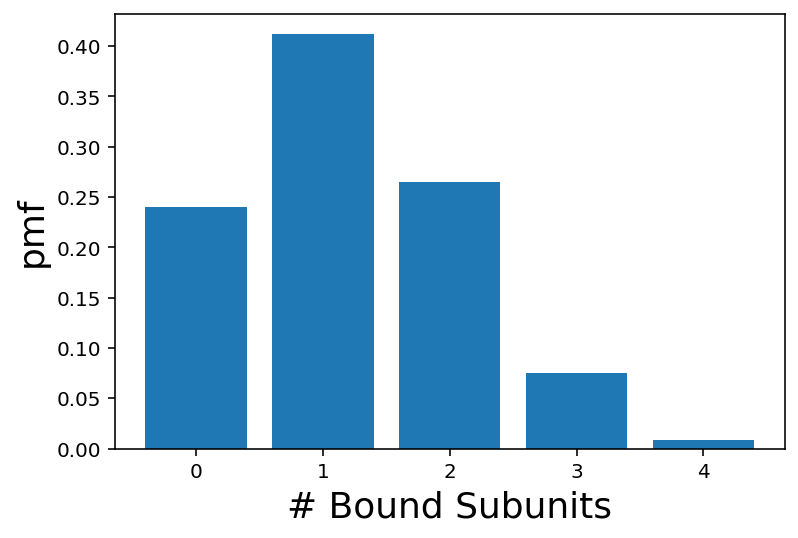

In [8]:
numSites = 4
probBoundAtEachSite = 0.3

boundDist = st.binom(numSites, probBoundAtEachSite)

numBound = np.arange(5)

plt.bar(numBound, boundDist.pmf(numBound))
plt.xlabel('# Bound Subunits')
plt.ylabel('pmf');

4. (3 pts) Mice are evaluated for depression following an experimental procedure using a set of tests that are summarized by a single score that is presumed to be correlated with their degree of depression. Scores for a group of mice had a mean value of 64 with a standard deviation of 12. Plot the distribution of scores. If a score above 80 is considered as being depressed, what is the probability that a mouse will be depressed following this experimental procedure?

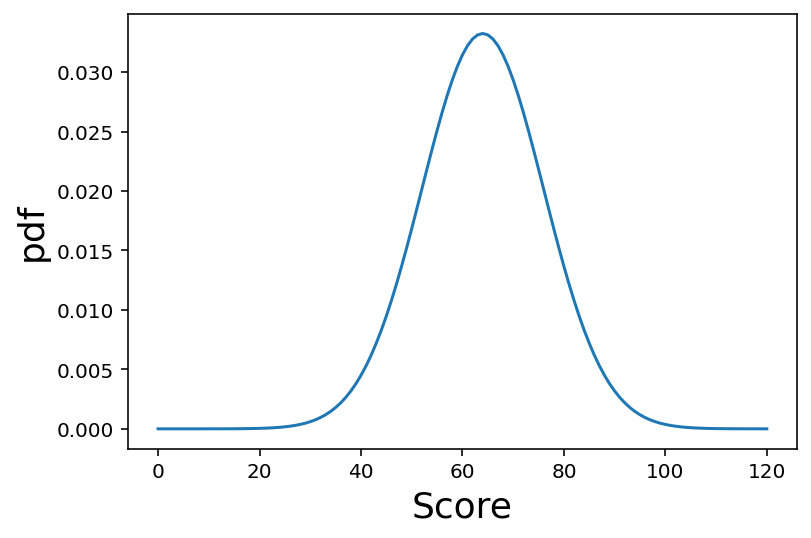

In [16]:
scoreDist = st.norm(64, 12)

scores = np.linspace(0, 120, 121)

plt.plot(scores, scoreDist.pdf(scores))
plt.xlabel('Score')
plt.ylabel('pdf');

In [14]:
probDepressed = scoreDist.sf(80)

print(f"{probDepressed * 100: .1f}% of mice will be depressed following the experimental protocol.")

 9.1% of mice will be depressed following the experimental protocol.
